# Deep Learning In Biomedical Imaging
## BMENE4460-2024-1

### <span style="color:red">Assignment 2</span> - MLP and CNN for [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html)

#### Due date/time: <span style="color:red">March 6, 11:59 pm</span>

#### Introduction
In this assignment, you will implement, train, and test the models explained in [Lecture 4](https://www.kaggle.com/code/xuzhezhang/bmene4460-lec4-mlp/notebook). However, instead of MNIST, you will solve [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html) object recognition problem.

#### Instructions:
1. You may use any publicly available resources to answer the questions, but you need to ***cite*** them properly to prevent plagiarism.
2. Using or copying other students' solutions is considered cheating, and you'll be graded **"0" for the entire assignment**.
3. You may be asked to write Python code or to explain something in each question. To write your answers, please use code and markdown blocks, respectively. If you need to better organize your answers, you may add more blocks. In this notebook, we placed a code block with a comment as `# [Your code here]` and a markdown block with the text "<span style="color:red">Your answer here</span>" for each question that needs them. If you wish to answer, please remove the comments first.
4. Please ***use comments at the beginning of each code blocks*** to explain what you've implemented in that block.
5. Please ***use LaTex formatting to write equations and formulas*** in markdown blocks wherever is needed.
6. Please define your variables with ***short and meaningful names***.
7. Please make sure ***internet access is granted*** on the settings panel.
8. For this assignment, you ***need GPU access***. You can either finish it in your local computer with GPU, or you can upload it to [Kaggle](https://www.kaggle.com/code) or [Colab](https://colab.research.google.com/). If you are using online notebook service, please set the "Accelerator" as "GPU" on the "Setting" panel. However, we recommend writing your script without enabling the GPU, and whenever you finish, you may enable the GPU for the final run. This way, you save your GPU access quota.

#### How to submit:
Once you finish the assignment, remember to <span style="color:red">"Run All"</span>. Ensure your outputs are appropriately displayed prior to submission!


Submission:
1. Rename the notebook as "BMEN4460_2024_Assignment2_Notebook_{YourUNI}" (Replace "{YourUNI}" with your UNI!).
2. Submit to Courseworks. 

**Acknowledgment:**
Soroush Arabshahi sa3617@columbia.edu

### <span style="color:red">(10 pts.)</span> New packages and Dataset management.

#### First, run the following code block to import all the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader, random_split

import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

from sklearn.metrics import confusion_matrix, accuracy_score

%config Completer.use_jedi = False

#### Execute the following code block to make sure the GPU access is enabled. Also, set the random seed for both `numpy`, and `torch` as 4460.

In [2]:
cuda = torch.cuda.is_available()
print("GPU available:", cuda)

torch.manual_seed(4460)# you don't have to set random seed beyond this block
np.random.seed(4460)

GPU available: True


#### As you may noticed, we are importing a new package called `torchvision`. Search for its documentation and briefly explain what does this package contains.

**torchvision is a library that contains many machine learning tools built specifically for image processing, including object segmentation, detection and classification.**

#### Run the code block below to download the CIFAR10 dataset.

In [3]:
# 1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 2
batch_size = 100

# 3
train_valid_set = CIFAR10(root='./data', train=True, download=True, transform=transform)

# 4
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# 5
trainset, validset = random_split(train_valid_set, [40000, 10000])

# 6
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
validloader = DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 7
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 84616615.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### Since this method of loading datasets is new to you, here we explain what is happening in each line.

<span style="color:blue">1. We defined a `transform` module to convert the CIFAR10 images to `Tensor`, and normalize their intensities so that the range is [-1, 1] for each channel. The original intensities are between [0, 255].</span>

<span style="color:blue">2. The `batch_size` defines the batch size we will use while making the data loaders.</span>

<span style="color:blue">3. On the `train_valid_set`, we will keep a handle (pointer in C/C++ language) of the training samples in the CIFAR10 dataset. The `CIFAR10` function downloads that part if it doesn't exist in the `./data` directory.</span>

<span style="color:blue">4. Similar to `train_valid_set`, the `testset` keeps the samples of the testing set on the CIFAR10 dataset.</span>

<span style="color:blue">5. Using the `random_split` function, we split the `train_valid_set` into `trainset` and `validset`, in which there will be $40,000$ samples in the training set and $10,000$ samples in the validation set.</span>

<span style="color:blue">6. Then we created data loaders for `trainset`, `validset`, and `testset`, naming `trainloader`, `validloader`, and `testloader`, respectively.</span>

<span style="color:blue">7. The `classes` variable keeps the name of the classes of 10 objects that exist in the CIFAR10 dataset. This will be useful when we want to retrieve the English name of the predicted or ground-truth label.</span>

You may use these resources to understand what is happening in more detail:

1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://pytorch.org/vision/stable/index.html

After this, we expect you to understand every variables defined above, including: `transform`, `batch_size`, `train_valid_set`, `trainset`, `validset`, `trainloader`, `validloader`, `testloader`, and `classes`. You should master using `transforms`, `datasets`, and `dataloaders` as it is necessary for your final project.

#### Now that you downloaded the CIFAR10 dataset, and created the datasets and dataloaders instances, answer the following questions about the dataset and plot the first 25 samples (in a 5x5 subplots) of the test set. Also, title each sample with its corresponding label using the `classes` variable.

##### a) What is the images sizes (Width and Height)? 
##### b) How many channels each image has?
##### c) How many batches (not samples) we have in each set (training, validation, and test)? 


Hint: To show the images correctly, first, it would be better to use sets instead of loaders since the loaders return a batch of images/labels, but sets return one sample at a time. Second, consider that the samples pulled from sets contain both the images and the labels. Third, the images are normalized torch tensors in $(C, H, W)$ format, and you need to convert them to a numpy array (`.numpy()` on tensors does the job), reverse the normalization step, and transpose them to become an array of $(H, W, C)$; otherwise, either your plots (using `plt.imshow`) will return an error or will be flipped.

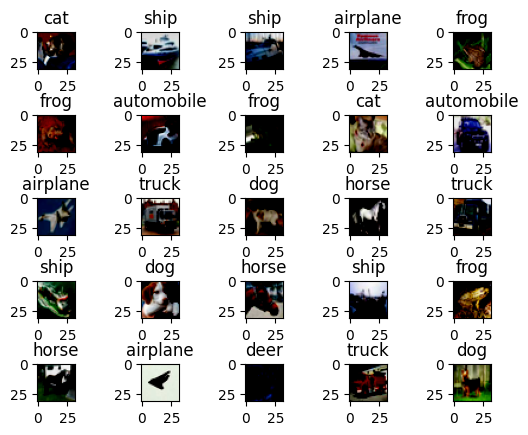

In [4]:
# Plotting first 25 samples of testing set
testBatch = next(iter(testloader))

for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    
    im = testBatch[0][i].numpy()
    im = im.transpose((1, 2, 0))
    label = testset.classes[testBatch[1][i]]
    
    plt.imshow(im)
    plt.title(label)

plt.subplots_adjust(wspace=0.3,hspace=1.2)
plt.show()

In [5]:
# Checking the dimensions of one image
testBatch[0][0].shape

torch.Size([3, 32, 32])

In [6]:
# Checking batches of each dataloader
len(trainloader), len(validloader), len(testloader)

(400, 100, 100)

**a) Each image has dimensions of 32x32 pixels.**
**b) Each image has three channels for red, green and blue values.**
**c) There are 400 batches in the training set, 100 in the validation set and 100 in the testing set.**

### <span style="color:red">(15 pts.)</span> MLP model

#### Consider the MLP architecture introduced in the [Lecture 4](https://www.kaggle.com/code/snnaik/bmene4460-lec4-mlp/notebook) notebook.

<div align="center">
  <img src="https://github.com/soroush361/AoE_BME/blob/main/MLP_Arc.png?raw=true" />
</div>

#### Modify this architecture that it can work with the CIFAR10 images.

Hint: All you need to do is to change the number of input units according to the shape of the images in the CIFAR10 dataset. Also, be careful about the flattening step.

In [7]:
# Defining MLP model (edited from code from Lec4_MLP)
class MLPModel(nn.Module):
    '''Reshape -> FC -> Sigmoid -> FC -> Sigmoid -> FC -> SoftMax -> Cross-Entropy'''
    def __init__(self):
        '''Define model modules.'''
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

our_MLP = MLPModel()
our_MLP.cuda()

print(our_MLP)

MLPModel(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


#### Define an "Adam" optimizer with a learning rate of $0.001$.

In [8]:
#Defining optimizer
optimizer = Adam(our_MLP.parameters(), lr = 0.001)

#Create directory to save model weights
!mkdir saved_models_MLP

#### Now train your modified MLP model for $25$ epochs on the training samples (`trainloader`).
##### The loss function is the same `CrossEntropy`. 
You may either use the `F.cross_entropy` function in the training/validation loop or define a `loss_fun` variable and assign it to the losses that exist in the `torch.nn` module. The latter method is recommended since you can easily change the loss without changing too much of your training/validation loop.

##### At the end of each epoch:
1. Validate the model performance using the validation samples (`validloader`). Be careful not to train your model on the validation set.
2. Save your model in `./mlp` directory. 
3. Collect the training and validation error for each epoch. (We need them for plotting the learning curves).

In [9]:
# Training the model (edited from code from Lec4_MLP)
EPOCHS = 25

# Two lists to keep the losses at the end of each epoch.
train_epoch_loss = list()
validation_epoch_loss = list()

for epoch in range(EPOCHS):
    train_loss = list()
    validation_loss = list()
    
    ################### Training Loop #####################
    
    # Set the model to train mode so that the parameters can be updated.
    our_MLP.train()
    
    for batch_index, (train_image, train_label) in enumerate(trainloader):
        train_label_predicted = our_MLP(train_image.cuda())

        # compute the loss
        loss = F.cross_entropy(train_label_predicted, train_label.cuda())
        train_loss.append(loss.cpu().data.item())

        # reset the gradient 
        optimizer.zero_grad()
        # backpropagate the loss
        loss.backward()
        # update the parameters
        optimizer.step()
        
    # Take the average of iteration losses and append it to the epoch losses list
    train_epoch_loss.append(np.mean(train_loss))
            
    #################### validation #######################
   
    # Set the model to evaluation mode so that parameters are fixed.
    our_MLP.eval()
        
    for batch_index, (validation_image, validation_label) in enumerate(validloader):
        validation_label_predicted = our_MLP(validation_image.cuda())
            
        loss = F.cross_entropy(validation_label_predicted, validation_label.cuda())
        validation_loss.append(loss.cpu().data.item())
    
    validation_epoch_loss.append(np.mean(validation_loss))
    
    # save models
    torch.save(our_MLP.state_dict(), './saved_models_MLP/checkpoint_epoch_%s.pth' % (epoch))

    print("Epoch: {} | train_loss: {} | validation_loss: {}".format(epoch, train_epoch_loss[-1], validation_epoch_loss[-1]))

Epoch: 0 | train_loss: 1.9100018832087517 | validation_loss: 1.7757157051563264
Epoch: 1 | train_loss: 1.7066806834936141 | validation_loss: 1.6741158843040467
Epoch: 2 | train_loss: 1.6187996244430543 | validation_loss: 1.6207737493515015
Epoch: 3 | train_loss: 1.5552234330773353 | validation_loss: 1.5866907584667205
Epoch: 4 | train_loss: 1.5006165945529937 | validation_loss: 1.5599777436256408
Epoch: 5 | train_loss: 1.453907830119133 | validation_loss: 1.5422443735599518
Epoch: 6 | train_loss: 1.4097180411219596 | validation_loss: 1.5344960355758668
Epoch: 7 | train_loss: 1.369993413388729 | validation_loss: 1.5266575288772584
Epoch: 8 | train_loss: 1.3284620627760888 | validation_loss: 1.5240423774719238
Epoch: 9 | train_loss: 1.2909527948498727 | validation_loss: 1.5263483548164367
Epoch: 10 | train_loss: 1.2528508681058883 | validation_loss: 1.5312206363677978
Epoch: 11 | train_loss: 1.2197994336485862 | validation_loss: 1.5259235286712647
Epoch: 12 | train_loss: 1.18295805498957

#### Similar to the lecture's notebook
1. Find the best epoch (minimum validation loss)
2. Plot the learning curves
3. Load the model at the best epoch
4. Report the overall accuracy of the MLP model on the test set
5. Plot the confusion matrix for the test set
6. Finally, plot the same first 25 samples of the test set, but this time title them with the ground truth and predicted label with "GT: {ground truth label}, Pred: {predicted label}" format, e.g., "GT: cat, Pred: dog".

In [10]:
# 1. Epoch with min validation loss
min_loss = min(validation_epoch_loss)
best_epoch = validation_epoch_loss.index(min_loss)
best_epoch

8

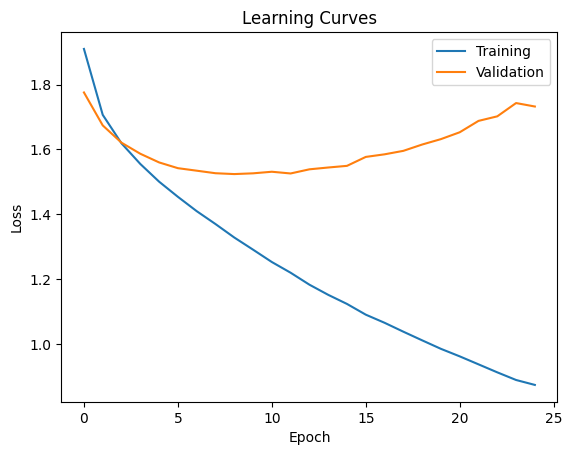

In [11]:
# 2. Plotting Learning Curves
plt.plot(train_epoch_loss)
plt.plot(validation_epoch_loss)
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])

plt.subplots_adjust(hspace=0.7)

In [12]:
# Loading best model
state_dict = torch.load('./saved_models_MLP/checkpoint_epoch_%s.pth' % (best_epoch))
our_MLP.load_state_dict(state_dict)

<All keys matched successfully>

In [13]:
# 4. Testing model on testing dataset
test_loss = list();
accuracies = list();
all_predictions = [];
all_labels = [];

our_MLP.eval()

for batch_index, (test_image, test_label) in enumerate(testloader):
    predicted_labels = [];
    
    test_label_predicted = our_MLP(test_image.cuda());
    label_predicted_probability, label_predicted_index = torch.max(test_label_predicted.data, 1);
    
    all_labels.append(test_label.tolist())
    for current_prediction in label_predicted_index:
        predicted_labels.append(current_prediction.detach().cpu().numpy().item());
    
    all_predictions.append(predicted_labels);
    #all_labels.append(test_label)
    accuracies.append(accuracy_score(test_label, predicted_labels));
            
    loss = F.cross_entropy(test_label_predicted, test_label.cuda());
    test_loss.append(loss.cpu().data.item());
    
overall_test_loss = np.mean(test_loss);
overall_accuracy = np.mean(accuracies);

In [14]:
# Accuracy of the best model on the testing dataset:
overall_accuracy

0.46559999999999996

Text(0.5, 23.52222222222222, 'Prediction')

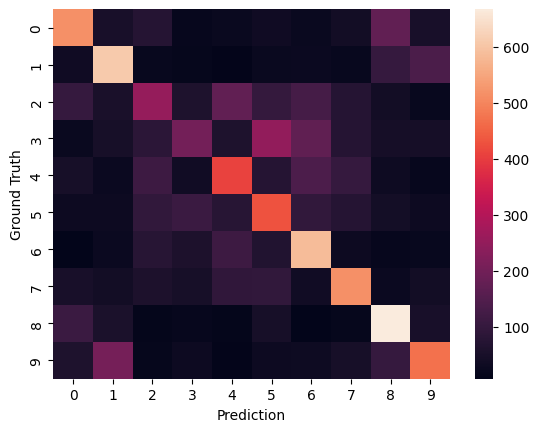

In [15]:
# 5. Plotting confusion matrix for all testing data
test_labels = [];
test_predictions = [];
for bat in all_labels:
    for label in bat:
        test_labels.append(label);
for bat in all_predictions:
    for pred in bat:
        test_predictions.append(pred);

sns.heatmap(confusion_matrix(test_labels, test_predictions))
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")

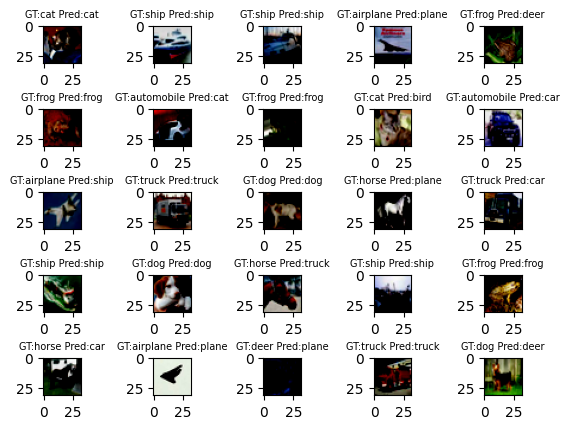

In [16]:
# 6. Plotting images with predictions and ground truths
testBatch = next(iter(testloader))

for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    
    im = testBatch[0][i].numpy()
    im = im.transpose((1, 2, 0))
    label = testset.classes[testBatch[1][i]]
    
    plt.imshow(im)
    plt.title("GT:"+label+" Pred:"+classes[all_predictions[0][i]], fontsize=7)

plt.subplots_adjust(wspace=1,hspace=1.2)
plt.show()

#### Comment on the MLP model performance.

**The model predicts the right type of classification about half of the time. It seems to perform better with cars and ships, but struggles more with predicting birds and cats correctly, as indicated by the confusion matrix.**

### <span style="color:red">(15 pts.)</span> CNN model

#### Consider the LeNet-5 architecture introduced in supplement notebook <BMENE4460_Assignment2_Supplement_LeNet>. Repeat the same procedure for that CNN model as you did for the MLP architecture.

<div align="center">
  <img src="https://github.com/soroush361/AoE_BME/blob/main/LeNet5_1.png?raw=true" />
</div>

##### We expect you to:
1. Modify the model so that it works with the CIFAR10 dataset.
2. Define an "Adam" optimizer with the learning rate of $0.001$.
3. Train the model on the training set and validate the model performance on the validation set for $25$ epochs. The loss function remains the same `CrossEntropy`.
4. Identify the best epoch.
5. Plot the learning curves.
6. Load the CNN model at the best epoch.
7. Report the overall accuracy on test set.
8. Plot the confusion matrix.
9. Finally, plot the first 25 samples of the test set with the ground truth and predicted labels.

Note: Don't forget to change the saving directory to `./cnn`. 

In [17]:
# Formula to calculate shape as we go through layer by layer = [(X - F + 2P)/S] + 1
# Here,
# X = Width / Height
# F = Kernel size
# P = Padding
# S = Strides (default = 1)

# Our input to the first layer is going to be [batchsize, 3, 32, 32]
# substitute, =[(32 - 5 + 2(0))/1] + 1
#             =[(27)/1] + 1
#             =27 + 1
#             =28

# 1. Defining LeNet Model (edited from supplementary lecture)
class LeNet5Model(nn.Module):
    '''ConvNet -> ReLU -> Max_Pool -> ConvNet -> ReLU -> Max_Pool -> Reshape -> FC -> Sigmoid -> FC -> Sigmoid -> FC -> SoftMax -> Cross-Entropy'''
    def __init__(self):
        '''Define model modules.'''
        super(LeNet5Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 5, 1)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self. conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5 * 5 * 16)
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

our_LeNet = LeNet5Model()
our_LeNet.cuda()

print(our_LeNet)

LeNet5Model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [18]:
# 2. Defining optimizer
CNN_optimizer = Adam(our_LeNet.parameters(), lr = 0.001)

# Create directory to save model weights
!mkdir saved_models_LeNet

In [19]:
# 3. Training LeNet model
CNN_EPOCHS = 25

# Two lists to keep the losses at the end of each epoch.
CNN_train_epoch_loss = list()
CNN_validation_epoch_loss = list()

for epoch in range(CNN_EPOCHS):
    train_loss = list()
    validation_loss = list()
    
    ################### Training Loop #####################
    
    # Set the model to train mode so that the parameters can be updated.
    our_LeNet.train()
    
    for batch_index, (train_image, train_label) in enumerate(trainloader):
        train_label_predicted = our_LeNet(train_image.cuda())

        # compute the loss
        loss = F.cross_entropy(train_label_predicted, train_label.cuda())
        train_loss.append(loss.cpu().data.item())

        # reset the gradient 
        CNN_optimizer.zero_grad()
        # backpropagate the loss
        loss.backward()
        # update the parameters
        CNN_optimizer.step()
        
    # Take the average of iteration losses and append it to the epoch losses list
    CNN_train_epoch_loss.append(np.mean(train_loss))
            
    #################### validation #######################
   
    # Set the model to evaluation mode so that parameters are fixed.
    our_LeNet.eval()
        
    for batch_index, (validation_image, validation_label) in enumerate(validloader):
        validation_label_predicted = our_LeNet(validation_image.cuda())
            
        loss = F.cross_entropy(validation_label_predicted, validation_label.cuda())
        validation_loss.append(loss.cpu().data.item())
    
    CNN_validation_epoch_loss.append(np.mean(validation_loss))
    
    # save models
    torch.save(our_LeNet.state_dict(), './saved_models_LeNet/checkpoint_epoch_%s.pth' % (epoch))

    print("Epoch: {} | train_loss: {} | validation_loss: {}".format(epoch, CNN_train_epoch_loss[-1], CNN_validation_epoch_loss[-1]))

Epoch: 0 | train_loss: 1.8928510403633119 | validation_loss: 1.6739637446403504
Epoch: 1 | train_loss: 1.5934036403894425 | validation_loss: 1.508117936849594
Epoch: 2 | train_loss: 1.4643874204158782 | validation_loss: 1.4294611632823944
Epoch: 3 | train_loss: 1.3868763428926467 | validation_loss: 1.386001752614975
Epoch: 4 | train_loss: 1.319701227247715 | validation_loss: 1.3372792196273804
Epoch: 5 | train_loss: 1.256339886635542 | validation_loss: 1.264129956960678
Epoch: 6 | train_loss: 1.1986756491661072 | validation_loss: 1.2155845540761947
Epoch: 7 | train_loss: 1.1439886578917504 | validation_loss: 1.1790281540155412
Epoch: 8 | train_loss: 1.0975850979983806 | validation_loss: 1.1529193663597106
Epoch: 9 | train_loss: 1.0585162273049356 | validation_loss: 1.1346221607923508
Epoch: 10 | train_loss: 1.0259187225997448 | validation_loss: 1.1245505315065385
Epoch: 11 | train_loss: 0.9907572050392628 | validation_loss: 1.1098405158519744
Epoch: 12 | train_loss: 0.957006853222847 |

In [20]:
# 4. Finding best model weights
CNN_min_loss = min(CNN_validation_epoch_loss)
CNN_best_epoch = CNN_validation_epoch_loss.index(CNN_min_loss)
CNN_best_epoch

14

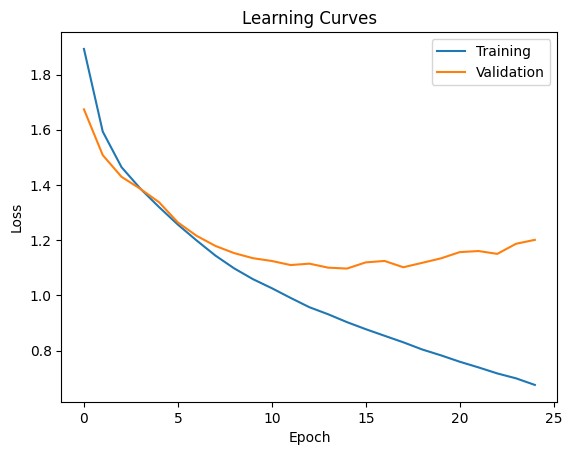

In [21]:
# 5. Plotting learning curves
plt.plot(CNN_train_epoch_loss)
plt.plot(CNN_validation_epoch_loss)
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])

plt.subplots_adjust(hspace=0.7)

In [22]:
# 6. Loading best model with lowest validation loss
CNN_state_dict = torch.load('./saved_models_LeNet/checkpoint_epoch_%s.pth' % (CNN_best_epoch))
our_LeNet.load_state_dict(CNN_state_dict)

<All keys matched successfully>

In [23]:
# 7. Calculating overall accuracy on testing data
CNN_test_loss = list();
CNN_accuracies = list();
CNN_predictions = [];
CNN_labels = [];

our_MLP.eval()

for batch_index, (test_image, test_label) in enumerate(testloader):
    predicted_labels = [];
    
    test_label_predicted = our_LeNet(test_image.cuda());
    label_predicted_probability, label_predicted_index = torch.max(test_label_predicted.data, 1);
    
    CNN_labels.append(test_label.tolist())
    for current_prediction in label_predicted_index:
        predicted_labels.append(current_prediction.detach().cpu().numpy().item());
    
    CNN_predictions.append(predicted_labels);
    #all_labels.append(test_label)
    CNN_accuracies.append(accuracy_score(test_label, predicted_labels));
            
    loss = F.cross_entropy(test_label_predicted, test_label.cuda());
    CNN_test_loss.append(loss.cpu().data.item());
    
overall_test_loss = np.mean(CNN_test_loss);
overall_accuracy = np.mean(CNN_accuracies);
overall_accuracy

0.6216

Text(0.5, 23.52222222222222, 'Prediction')

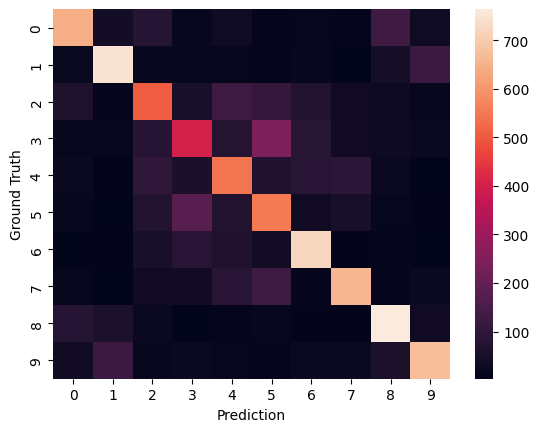

In [24]:
# 8. Plotting confusion matrix of all testing data
CNN_test_predictions = [];
for bat in CNN_predictions:
    for pred in bat:
        CNN_test_predictions.append(pred);

sns.heatmap(confusion_matrix(test_labels, CNN_test_predictions))
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")

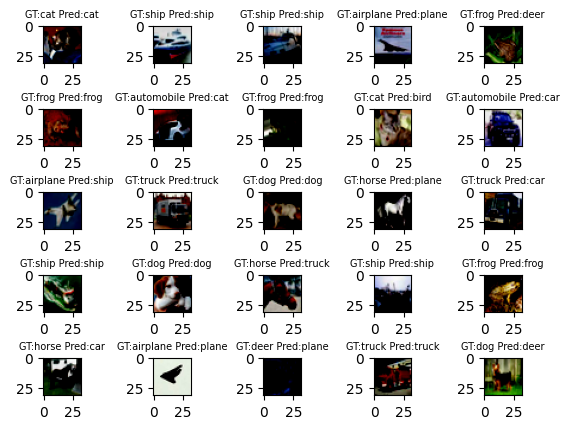

In [25]:
# 9. Plotting images with predictions and ground truths
testBatch = next(iter(testloader))

for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    
    im = testBatch[0][i].numpy()
    im = im.transpose((1, 2, 0))
    label = testset.classes[testBatch[1][i]]
    
    plt.imshow(im)
    plt.title("GT:"+label+" Pred:"+classes[all_predictions[0][i]], fontsize=7)

plt.subplots_adjust(wspace=1,hspace=1.2)
plt.show()

### <span style="color:red">(5 pts.)</span> MLP vs. CNN model

#### Compare the performance of the CNN (LeNet-5) model versus the MLP model. 

**The CNN model performs slightly better than the MLP model, with an accuracy of 54% as opposed to MLP's 46.5% on the testing dataset. It also seems to perform better and struggle with the same categories, but does markedly better with the categories that MLP struggled in.**

#### What would you recommend to improve the performance of the CNN model?

**Adding more layers can increase the model complexity and perhaps lead to it identifying more nuances in the input data.**